<a href="https://colab.research.google.com/github/JS-DS-coder/CienciaDeDatos2021/blob/master/minibatch_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Practica no. 1 - Mini Batch Gradient Descent**

Jairo Salazar

Carnet : 21000887 

***Parte I - Carga de Dataset ***

In [117]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt

import datetime, os

print(tf.__version__)

if tf.__version__.startswith("2."):
  import tensorflow.compat.v1 as tf
  tf.compat.v1.disable_v2_behavior()
  tf.compat.v1.disable_eager_execution()
  print("Enabled compatitility to tf1.x")

%load_ext tensorboard

2.5.0
Enabled compatitility to tf1.x
The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [118]:
tf.reset_default_graph()
g=tf.Graph()
with g.as_default():
  with tf.name_scope ("Load_Dataset"):
    x1  = tf.placeholder("float",[1,1],name="X1")
    y1  = tf.placeholder("float",[1,1],name="Y1")
    n1  = tf.placeholder("float",[1,0],name ="MiniBatchSize")
    m1 = tf.placeholder("float",[1,1],name="m1")
    b1 = tf.placeholder("float",[1,1],name="b1")
    learningrate1 = tf.placeholder("float",[1,1],name="learningrate1")
  with tf.name_scope  ("Evaluate_Model"):
    yhat1 = tf.add(tf.matmul(x1,m1),b1)
  with tf.name_scope("Evaluate_Cost"):
    cost = tf.reduce_sum(tf.pow(yhat1-y1,2))/(2*n1)
  #optimizer = tf.train.GradientDescentOptimizer(learningrate1).minimize(cost)
  init = tf.global_variables_initializer


In [84]:
def slicingDataset (ds,inicio,porcentaje):
  cantidad = int(np.round(ds.shape[0] * porcentaje,0))
  return ds[inicio:inicio+cantidad,0:6]
  
Dataset = np.load('casas.npy')
#print (Dataset.shape)
dsEntrenamiento = slicingDataset(Dataset,0,0.80)  #dsEntrenamiento datos de entrenamiento
#dsTest = slicingDataset(Dataset,int(dsEntrenamiento.shape[0])-1,0.20) #dsTest Valores de prueba
#print (dsTest.shape)
print (dsEntrenamiento.shape)

(1168, 6)


**Parte II - Definicion de Modelo Lineal**

In [104]:
class ModeloLineal:
  def __init__(self):
    tf.reset_default_graph()
    # Pendiente e intercepto
    self.m = tf.get_variable("m",dtype=tf.float32,shape=[],initializer=tf.zeros_initializer())
    self.b = tf.get_variable("b",dtype=tf.float32,shape=[],initializer=tf.zeros_initializer())

  #Calculo de yhat = mx+b
  def __call__(self,x):
    
    return self.m*x + self.b

  def actualizar(self,x,y,learning_rate):
    with tf.name_scope("Model"):
      yhat= self(x)
    with tf.name_scope("Error"):
      error = 1/2*tf.reduce_mean(tf.math.square(y - yhat) )
      gradiente = tf.gradients(error,[self.m,self.b],name="Gradients")
      actualizacion_m = tf.assign(self.m, self.m - learning_rate*gradiente[0],name="actualizacion_m" )
      actualizacion_b = tf.assign(self.b, self.b - learning_rate*gradiente[1],name="actualizacion_b" )
      actualizacion_parametros = tf.group(actualizacion_m,actualizacion_b)
    
    return actualizacion_parametros

In [105]:

def Regresion (dataset,n,learning_rate,epoch):
    #x = variable independiente
    #y = Variable dependiente
    #n = Tamaño del mini batch
    #learning_rate = Learning rate
    #epoch = numero de aproximaciones
  with tf.name_scope("Prepare_MiniBatch"):
    y = dataset[0:0+n,0:1] #Precio
    x = dataset[0:0+n,1:2] #OveralQuality
    

  plt.scatter(x,y)
  modelo = ModeloLineal()
  tensor_x = tf.placeholder(tf.float32,x.shape,"tensor_x")
  tensor_y = tf.placeholder(tf.float32,y.shape,"tensor_y")
  prediccion = modelo(tensor_x)
  actualizacion_parametros = modelo.actualizar(tensor_x,tensor_y,learning_rate)
    
  with tf.train.MonitoredSession() as session:
    feed_dict = {tensor_x:x, tensor_y:y}

    for i in range(epoch):
        
      
      session.run(actualizacion_parametros,feed_dict=feed_dict)
    
      predicciones = session.run(prediccion,feed_dict=feed_dict)
      
      plt.plot(x,predicciones,label=str(i))

    
    pendiente_final,intercepto_final = session.run([modelo.m,modelo.b],feed_dict=feed_dict)
    plt.title("Parámetros finales: m={}  b={}".format(pendiente_final,intercepto_final))

  plt.legend()
  plt.show()
  


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


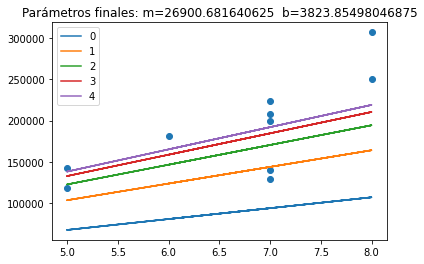

In [106]:
#tf.reset_default_graph()

Regresion (dsEntrenamiento,10,0.01,5)
